In [1]:
import time
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import bmi_cfe_perturb_ens

# 1. Run Normal CFE Simulations

In [2]:
cfe_instance = bmi_cfe_perturb_ens.BMI_CFE('./cat58_config_cfe_perturbs.json')

In [3]:
cfe_instance.initialize()


In [4]:
with open(cfe_instance.forcing_file, 'r') as f:
    df_forcing = pd.read_csv(f)
    
outputs = cfe_instance.get_output_var_names()
output_lists = {output:{ens:[] for ens in range(cfe_instance.n_cfe_ensembles)} for output in outputs}


for t, precip in enumerate(df_forcing['APCP_surface']):
    
    cfe_instance.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux', precip)
    
    cfe_instance.update()
    
    for output in outputs:
    
        temp_output = cfe_instance.get_value(output)
        
        for ens in range(cfe_instance.n_cfe_ensembles):
            if output == 'atmosphere_water__time_integral_of_precipitation_mass_flux':
                output_lists[output][ens].append(temp_output)
            else:
                output_lists[output][ens].append(temp_output[ens])

In [5]:
cfe_instance.finalize()


GLOBAL MASS BALANCE
  initial volume:   0.7456
    volume input: 252.7983
   volume output: 243.0468
    final volume:   1.8065
        residual: -3.2197e+00

PARTITION MASS BALANCE
    surface runoff: 250.5394
      infiltration:   2.2589
 vol. et from rain:   0.0000
partition residual: 1.1013e-13

GIUH MASS BALANCE
  vol. into giuh: 250.5394
   vol. out giuh: 238.6290
 vol. end giuh q:  11.9104
   giuh residual: -7.4607e-14

SOIL WATER MASS BALANCE
     init soil vol:   0.0000
    vol. into soil:   2.2589
  vol.soil2latflow:   1.4436
   vol. soil to gw:   1.7566
 vol. et from soil:   0.0000
   final vol. soil:   0.7743
  vol. soil resid.: -1.7157e+00

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   1.4436
  vol. from nash:   1.2081
 final vol. nash:   0.2355
nash casc resid.: 1.6653e-16

GROUNDWATER CONCEPTUAL RESERVOIR MASS BALANCE
init gw. storage:   0.0000
       vol to gw:   1.7566
     vol from gw:   2.9741
final gw.storage:   1.0322
    gw. residual: -2.2496

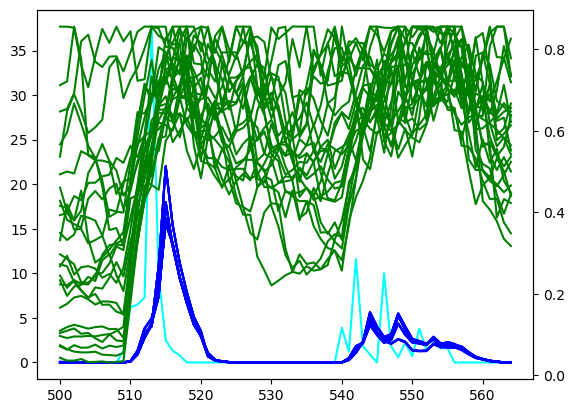

In [6]:
fig,ax=plt.subplots()
ax.plot(df_forcing.index.values[500:565], df_forcing.loc[501:565, 'APCP_surface'], c="cyan", label="mean precip")
ax2=ax.twinx()
for ens in range(cfe_instance.n_cfe_ensembles):
    ax.plot(df_forcing.index.values[500:565], output_lists['land_surface_water__runoff_depth'][ens][500:565], c="b", label="Q")
    ax2.plot(df_forcing.index.values[500:565], output_lists['SOIL_CONCEPTUAL_STORAGE'][ens][500:565], c="g", label="soil moisture")
plt.show()
plt.close()